In [4]:
import pandas_datareader as data
from datetime import date
# key="yahoo"
# df = pdr.get_data_tiingo('AAPL', api_key=key)
start = '2010-01-01'
end = date.today()

df = data.DataReader('SBIN.NS', 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-01,477.250000,464.000000,464.450012,475.299988,17156956.0,475.299988
2021-12-02,478.149994,470.950012,474.500000,477.000000,12962679.0,477.000000
2021-12-03,481.500000,470.049988,475.750000,473.149994,16653993.0,473.149994
2021-12-06,477.000000,463.799988,473.149994,465.299988,14353300.0,465.299988
2021-12-08,488.100006,480.250000,480.899994,486.399994,9430810.0,486.399994


In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,230.000000,227.500000,227.500000,229.119995,11031470.0,202.633774
2010-01-05,231.000000,228.009995,230.800003,229.205002,11613740.0,202.708939
2010-01-06,231.500000,228.500000,229.699997,230.580002,14527930.0,203.925003
2010-01-07,231.000000,228.110001,230.600006,229.289993,8576510.0,202.784103
2010-01-08,230.389999,228.009995,229.399994,228.604996,10453820.0,202.178314


In [6]:
len(df)

2943

# New Section

In [7]:

df1=df.reset_index()['Close']
df1

0       229.119995
1       229.205002
2       230.580002
3       229.289993
4       228.604996
           ...    
2938    475.299988
2939    477.000000
2940    473.149994
2941    465.299988
2942    486.399994
Name: Close, Length: 2943, dtype: float64

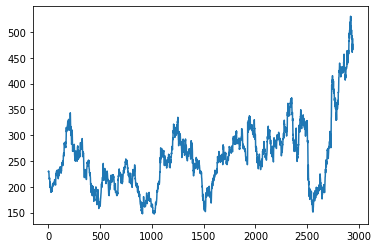

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.21342241]
 [0.21364431]
 [0.21723354]
 ...
 [0.85042675]
 [0.82993547]
 [0.88501392]]


In [11]:
len(df1)

2943

In [12]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(1912, 1031)

In [13]:
print(test_data)


[[0.27627971]
 [0.27210317]
 [0.28554647]
 ...
 [0.85042675]
 [0.82993547]
 [0.88501392]]


In [14]:
len(test_data)

1031

In [18]:
# import keras.backend as K
# def percentage_difference(y_true, y_pred):
#     return K.mean(abs(y_pred/y_true - 1) * 100)

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 300
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


(1611, 300)
(1611,)
(730, 300)
(730,)


In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(300,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')  #,metrics=[percentage_difference]
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 300, 100)          40800     
                                                                 
 lstm_4 (LSTM)               (None, 300, 100)          80400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=128,verbose=1)


Epoch 1/50
13/13 [==============================] - 24s 2s/step - loss: 0.0125 - val_loss: 0.0182
Epoch 2/50
13/13 [==============================] - 21s 2s/step - loss: 0.0025 - val_loss: 0.0094
Epoch 3/50
13/13 [==============================] - 23s 2s/step - loss: 0.0013 - val_loss: 0.0036
Epoch 4/50
13/13 [==============================] - 21s 2s/step - loss: 0.0012 - val_loss: 0.0033
Epoch 5/50
13/13 [==============================] - 24s 2s/step - loss: 0.0011 - val_loss: 0.0041
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.0010 - val_loss: 0.0036
Epoch 7/50
13/13 [==============================] - 24s 2s/step - loss: 9.5276e-04 - val_loss: 0.0029
Epoch 8/50
13/13 [==============================] - 23s 2s/step - loss: 8.9639e-04 - val_loss: 0.0028
Epoch 9/50
13/13 [==============================] - 23s 2s/step - loss: 8.6563e-04 - val_loss: 0.0023
Epoch 10/50
13/13 [==============================] - 22s 2s/step - loss: 8.6291e-04 - val_loss: 0.0025
Epo

In [20]:
train_loss = model.history.history['loss']

In [21]:
train_loss

[0.01245207991451025,
 0.002510001650080085,
 0.0013243677094578743,
 0.0012007475597783923,
 0.0010978025384247303,
 0.001010551699437201,
 0.0009527585934847593,
 0.0008963888976722956,
 0.000865625508595258,
 0.000862910586874932,
 0.0008509204490110278,
 0.0008417228236794472,
 0.0007863666978664696,
 0.0007627099985256791,
 0.000757615955080837,
 0.0007461430504918098,
 0.0007066491525620222,
 0.0006804941222071648,
 0.0006852998048998415,
 0.0006757488008588552,
 0.0006297751097008586,
 0.0006209915736690164,
 0.0006003023008815944,
 0.0006098920130170882,
 0.0005803385283797979,
 0.0005742573412135243,
 0.0005697256419807673,
 0.0005685577052645385,
 0.000530433258973062,
 0.0005078012472949922,
 0.0004997821524739265,
 0.0004875318845734,
 0.0005143516464158893,
 0.0004789390368387103,
 0.0004574393678922206,
 0.00044487364357337356,
 0.0004429391701705754,
 0.00042924375156871974,
 0.0004234767984598875,
 0.0004575113416649401,
 0.0004244605952408165,
 0.00039658942841924727,


In [23]:
len(train_loss)

50

In [22]:
val_loss = model.history.history['val_loss']

In [24]:
len(val_loss)

50

In [25]:
import matplotlib.pyplot as plt

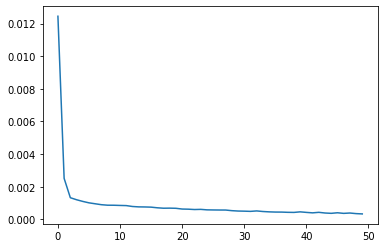

In [26]:
plt.plot(train_loss)

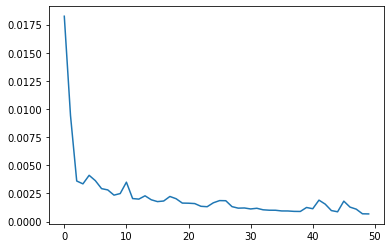

In [27]:
plt.plot(val_loss)

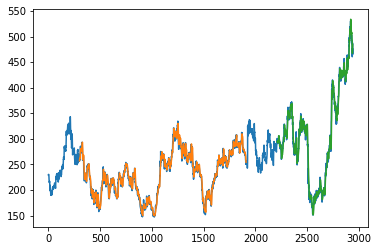

In [30]:
import tensorflow as tf

tf.__version__


### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)



##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


look_back=300
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
print(ytest)


[0.38291259 0.37730034 0.38030223 0.38317364 0.37795293 0.38487035
 0.38774175 0.39740009 0.38252105 0.37521209 0.39230987 0.38878588
 0.41227905 0.41227905 0.41293164 0.40562269 0.39948834 0.40275128
 0.40666681 0.39165728 0.38526197 0.37873609 0.37299328 0.36359599
 0.36725047 0.36033305 0.35041374 0.34780339 0.36568432 0.38186846
 0.3577227  0.35654809 0.35837529 0.36986082 0.36555376 0.36189928
 0.34754234 0.33422953 0.31256363 0.30173068 0.29389963 0.30160012
 0.31412986 0.31491293 0.32261351 0.32052518 0.31060587 0.31399929
 0.31765377 0.32783421 0.33697044 0.34127751 0.35080528 0.34936962
 0.36542327 0.36424858 0.38056329 0.37730034 0.39426764 0.39570338
 0.40640576 0.40836352 0.393354   0.3827821  0.40758045 0.42141529
 0.44804092 0.45782974 0.47414444 0.45195644 0.45534987 0.4429507
 0.4318567  0.43694692 0.42689704 0.43733845 0.43825209 0.43916573
 0.43955727 0.42663599 0.42467823 0.41214857 0.42650551 0.41462843
 0.43107362 0.42441726 0.41971857 0.42454774 0.4212848  0.41267

In [32]:
print(test_predict)

[[294.5747 ]
 [295.57663]
 [294.63043]
 [293.03546]
 [292.10123]
 [291.64536]
 [292.27957]
 [293.82697]
 [296.41595]
 [297.58423]
 [296.51797]
 [295.9419 ]
 [295.9837 ]
 [298.5786 ]
 [302.26807]
 [305.34595]
 [306.19604]
 [304.664  ]
 [302.52725]
 [301.38232]
 [300.0048 ]
 [298.09055]
 [295.7862 ]
 [293.43054]
 [290.89838]
 [289.26096]
 [288.0947 ]
 [286.47122]
 [284.54633]
 [284.52005]
 [287.37213]
 [289.0317 ]
 [288.60574]
 [287.02936]
 [286.38068]
 [286.3885 ]
 [286.35373]
 [284.86575]
 [281.50424]
 [276.0025 ]
 [269.7701 ]
 [264.3199 ]
 [261.57452]
 [262.3954 ]
 [265.25165]
 [268.91278]
 [271.6888 ]
 [272.01895]
 [270.73825]
 [269.23767]
 [269.05792]
 [270.73196]
 [273.53638]
 [277.00705]
 [279.8219 ]
 [282.75198]
 [285.10754]
 [287.91357]
 [290.21936]
 [293.0702 ]
 [295.8972 ]
 [298.9309 ]
 [301.5855 ]
 [301.8649 ]
 [299.45624]
 [298.60712]
 [301.08008]
 [307.71646]
 [316.07053]
 [324.26245]
 [327.43076]
 [326.26816]
 [321.94818]
 [316.36536]
 [312.7312 ]
 [310.93448]
 [311.80667]

In [33]:
#ACCURACY
# from sklearn.metrics import confusion_matrix,accuracy_score 
# import numpy as np
# loss, accuracy = model.evaluate(X_test, ytest)
# print(loss)
# print(accuracy)
# cm = confusion_matrix(ytest, np.array(test_predict))
# print(cm)
ypred=model.predict(X_test)
# cm = confusion_matrix(ytest,np.array(ypred))
from sklearn.metrics import r2_score
r2_score(ytest, ypred)    


0.9876838146975214

In [34]:
len(test_data)

1031

In [53]:

x_input=test_data[len(test_data)-300:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.101386084633242,
 0.0951212543744695,
 0.07567413562242642,
 0.09094467431474162,
 0.1041269628080122,
 0.09838419509900087,
 0.09929779460337801,
 0.11208854614203262,
 0.10804249167744984,
 0.11548201246170914,
 0.1131326712415549,
 0.11522096127141884,
 0.13297136677903337,
 0.1340154918785556,
 0.12618443413968033,
 0.13753948379337727,
 0.11874495318624051,
 0.12683702228458665,
 0.14785036851673256,
 0.14537054153225254,
 0.14719778037182624,
 0.14602312967715886,
 0.14471795338734633,
 0.1287947867193055,
 0.12344355596491013,
 0.11248008309664864,
 0.10791196608230469,
 0.10934766796726236,
 0.12709807347487695,
 0.1498081329514513,
 0.15568142625560782,
 0.1860920178759124,
 0.18752771976087007,
 0.18831083350092143,
 0.22015712700618378,
 0.22668300845524653,
 0.2073664152983486,
 0.21428383370202725,
 0.21480589625178842,
 0.24234512393299706,
 0.2731472923387371,
 0.24117047323832957,
 0.24900153097720495,
 0.23842959506355937,
 0.2518729347471203,
 0.24965411912211116,


In [54]:
len(x_input)

1

In [55]:
len(temp_input)

300

In [56]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=300
i=0
while(i<30):
    
    if(len(temp_input)>300):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8707761]
301
1 day input [0.09512125 0.07567414 0.09094467 0.10412696 0.0983842  0.09929779
 0.11208855 0.10804249 0.11548201 0.11313267 0.11522096 0.13297137
 0.13401549 0.12618443 0.13753948 0.11874495 0.12683702 0.14785037
 0.14537054 0.14719778 0.14602313 0.14471795 0.12879479 0.12344356
 0.11248008 0.10791197 0.10934767 0.12709807 0.14980813 0.15568143
 0.18609202 0.18752772 0.18831083 0.22015713 0.22668301 0.20736642
 0.21428383 0.2148059  0.24234512 0.27314729 0.24117047 0.24900153
 0.2384296  0.25187293 0.24965412 0.25604947 0.25291706 0.26283641
 0.259965   0.28437178 0.30316635 0.31908951 0.32509329 0.32104728
 0.31895895 0.32652903 0.33109715 0.32183035 0.31856741 0.31412986
 0.32391868 0.28019524 0.28737375 0.30186117 0.31191104 0.3337075
 0.34075541 0.33814506 0.33305492 0.34467094 0.348978   0.35080528
 0.35941941 0.36633691 0.36189928 0.35276305 0.37886657 0.41619458
 0.41736927 0.40849409 0.38395679 0.39478974 0.40510058 0.38500092
 0.3558955  0.34871703 0.33488211 0

In [65]:
day_new=np.arange(1,301)
day_pred=np.arange(301,331)

In [66]:
import matplotlib.pyplot as plt

In [67]:
len(df1)

2943

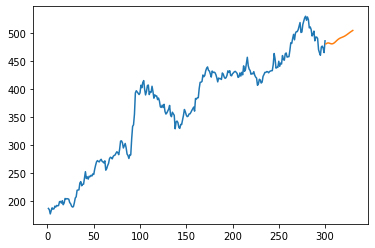

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-300:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

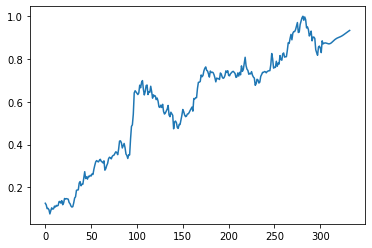

In [76]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2640:])

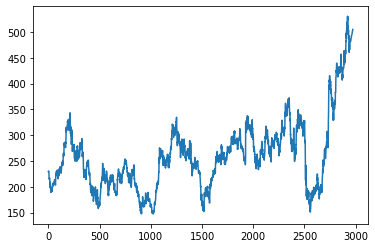

In [73]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [74]:
model.save('future122.h5')